In [1]:
import numpy as np
# import chainer
# from chainer import Function, gradient_check, report, training, utils, Variable
# from chainer import datasets, iterators, optimizers, serializers
# from chainer import Link, Chain, ChainList
# import chainer.functions as F
# import chainer.links as L
# from chainer.training import extensions
import os, sys, re
from nltk import tokenize
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shivamverma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [102]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [11]:
TEXT_DATA_DIR = './speech_data/data/'

In [12]:
texts = []  # list of text samples
# labels_index = {}  # dictionary mapping label name to numeric id
# labels = []  # list of label ids
for name in sorted(os.listdir(TEXT_DATA_DIR)):
#     print name
    path = os.path.join(TEXT_DATA_DIR, name)
#     print path
    if os.path.isdir(path):
#         label_id = len(labels_index)
#         labels_index[name] = label_id
        for fname in sorted(os.listdir(path)):
            if 'combined' not in fname and 'combines' not in fname:
#                 print fname
#             if fname.isdigit():
                fpath = os.path.join(path, fname)
                f = open(fpath)
                texts.append(f.read())
                f.close()
#                 labels.append(label_id)

print('Found %s texts.' % len(texts))

Found 981 texts.


In [21]:
texts[500][:1290]

'Mr. Speaker, Mr. Vice President, my copartners in Government, gentlemen and ladies:   The Constitution imposes upon me the obligation to "from time to time give to the Congress information of the State of the Union." While this has traditionally been interpreted as an annual affair, this tradition has been broken in extraordinary times.   These are extraordinary times. And we face an extraordinary challenge. Our strength as well as our convictions have imposed upon this nation the role of leader in freedom\'s cause.   No role in history could be more difficult or more important. We stand for freedom. That is our conviction for ourselves\xe2\x80\x94that is our only commitment to others. No friend, no neutral and no adversary should think otherwise. We are not against any man\xe2\x80\x94or any nation\xe2\x80\x94or any system\xe2\x80\x94except as it is hostile to freedom. Nor am I here to present a new military doctrine, bearing any one name or aimed at any one area. I am here to promote

In [24]:
def normalize_corpus(text, replace_period=False):
    import string 
    
    sents = tokenize.sent_tokenize(text.decode('utf8'))
    sents = map(lambda x: x.replace('.',' '), sents)
    text = ' . '.join(sents)
        
    for char in string.punctuation:
        if not replace_period and char=='.':
            text = text.replace(char, ' . ') #text.replace(char, ' ' + char + ' ')
        else:
            text = text.replace(char, ' ') #text.replace(char, ' ' + char + ' ')
    
    text = re.sub(r'[^\x00-\x7F]+',' ', text) #remove non-ASCII chars
    text = re.sub( '\s+', ' ', text).lstrip().rstrip() #remove extra and trailing spaces
    
    #
    
    return text.lower()

norm_texts = map(lambda x: normalize_corpus(x), texts)

In [30]:
norm_texts[500][:1270]

u'mr speaker mr vice president my copartners in government gentlemen and ladies the constitution imposes upon me the obligation to from time to time give to the congress information of the state of the union . while this has traditionally been interpreted as an annual affair this tradition has been broken in extraordinary times . these are extraordinary times . and we face an extraordinary challenge . our strength as well as our convictions have imposed upon this nation the role of leader in freedom s cause . no role in history could be more difficult or more important . we stand for freedom . that is our conviction for ourselves that is our only commitment to others . no friend no neutral and no adversary should think otherwise . we are not against any man or any nation or any system except as it is hostile to freedom . nor am i here to present a new military doctrine bearing any one name or aimed at any one area . i am here to promote the freedom doctrine . the great battleground for

In [23]:
# def normalize_corpus(text):
#     import string 
    
#     for char in string.punctuation:
#         text = text.replace(char, ' ')#text.replace(char, ' ' + char + ' ')
    
#     text = re.sub(r'[^\x00-\x7F]+',' ', text) #remove non-ASCII chars
#     text = re.sub( '\s+', ' ', text).lstrip().rstrip() #remove extra and trailing spaces
    
#     return text.lower()

# norm_texts = map(lambda x: normalize_corpus(x), texts)

In [36]:
samp = norm_texts[500]

### Getting sent and word frequencies

In [56]:
def get_sent_lens(par):
    sents = par.split(".")
    return map(lambda x: len(x.lstrip().rstrip().split(" ")), sents)

In [58]:
len(get_sent_lens(samp))

224

In [63]:
a = []

In [66]:
a.append(get_sent_lens(samp)[:10])

In [81]:
sent_lens = []
par_lens = []

par_lens = map(lambda x: np.array(get_sent_lens(x)), norm_texts)
par_arr = np.array(par_lens)
#     sent_lens[ind].append(len(x.split(".")))
#     par_lens.append(len(x.replace(".","").split(" ")))

In [82]:
par_arr[:10]

array([ array([ 79,  86,  30,  45,  54,  83,  22,  33,  14,  28,  57,  36,  51,
        24,  52,  47,  51,  14, 113,  18,  34,   9,  24,  32,  16,  30,
        42,  47,  38,  37, 116,  56,  26,  29, 728,  68,  53]),
       array([ 47,  75, 104,  29,  45,  45,  79,  33,  59,  67,  21,  11,  41,
        36,   7,  52,  40,  44,  51,  14,  47,  49,  35,  39,  51,  51,
        60,   9,  94,  36,  25,  42,  10,  52,  32,  34,  16,  17,  34,
        48,  36,  15,  49,  22,  59,  33,  54,  42,  38,  25,  24,  35,
        44,  12,  29,  30,  20,  46,  49,  66,  25,  38,  54,  31,  33,
        30,  40,  33,  54,  44,  59,  64,  77,  34]),
       array([ 32,  42,  47,  37, 100,  21,  32,  45,  62,  38,  20,  38, 103,
        11,   9,  13,  26,   9,  24,  50,  80,  25,  50,  14,  43,  52,
        63, 101,  43,  45,  20,  47,  13,  40,  60, 116,  36,  19,  36,
        12,  11,  11,  19,  11,  18,  25,  33,  69,  27,  50,  20,  12,
        19,  37,  13]),
       array([ 75, 141,  38,  42,  75,  30, 

In [83]:
par_arr[0]

array([ 79,  86,  30,  45,  54,  83,  22,  33,  14,  28,  57,  36,  51,
        24,  52,  47,  51,  14, 113,  18,  34,   9,  24,  32,  16,  30,
        42,  47,  38,  37, 116,  56,  26,  29, 728,  68,  53])

In [92]:
np.array([[1,2,3],[4,5,6]]).flatten()

array([1, 2, 3, 4, 5, 6])

In [97]:
for x in par_arr[:10]:
    print len(x)

37
74
55
46
24
38
6
59
3
14


In [99]:
sent_freq = []
for x in par_arr:
    sent_freq.append(len(x))

In [101]:
len(sent_freq)

981

In [118]:
sum(map(lambda x: x > 400, sent_freq)) #sorted(sent_freq, reverse=True)

43

(array([ 113.,   85.,   75.,   62.,   61.,   48.,   42.,   28.,   32.,
          38.,   36.,   35.,   46.,   28.,   30.,   23.,   33.,   20.,
          13.,    4.,   10.,    9.,   13.,    7.,    6.,    7.,    6.,
           3.,    5.,    4.,    7.,    5.,    4.,    5.,    1.,    4.,
           2.,    1.,    3.,    2.,    2.,    2.,    0.,    5.,    1.,
           2.,    0.,    1.,    2.,    1.,    0.,    0.,    2.,    0.,
           0.,    0.,    1.,    0.,    0.,    0.,    0.,    1.,    0.,
           0.,    0.,    0.,    0.,    2.,    0.,    0.,    0.,    0.,
           0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([  1.00000000e+00,   1.31200000e+01,   2.52400000e+01,
          3.73600000e+01,   4.94800000e+01,   6.16000000e+01,
          7.37200000e+01,   8.58400000e+01,   9.79600000e+01,
          1.10080000e+02

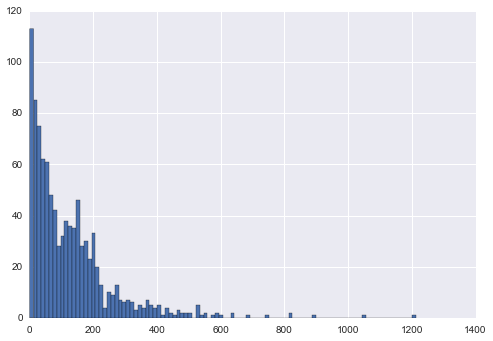

In [105]:
plt.hist(sent_freq,100)

In [98]:
maxi = 0
for x in par_arr:
    if len(x) > maxi:
        maxi = len(x)
print maxi

1213


In [120]:
par_arr[:5].flatten()

array([ array([ 79,  86,  30,  45,  54,  83,  22,  33,  14,  28,  57,  36,  51,
        24,  52,  47,  51,  14, 113,  18,  34,   9,  24,  32,  16,  30,
        42,  47,  38,  37, 116,  56,  26,  29, 728,  68,  53]),
       array([ 47,  75, 104,  29,  45,  45,  79,  33,  59,  67,  21,  11,  41,
        36,   7,  52,  40,  44,  51,  14,  47,  49,  35,  39,  51,  51,
        60,   9,  94,  36,  25,  42,  10,  52,  32,  34,  16,  17,  34,
        48,  36,  15,  49,  22,  59,  33,  54,  42,  38,  25,  24,  35,
        44,  12,  29,  30,  20,  46,  49,  66,  25,  38,  54,  31,  33,
        30,  40,  33,  54,  44,  59,  64,  77,  34]),
       array([ 32,  42,  47,  37, 100,  21,  32,  45,  62,  38,  20,  38, 103,
        11,   9,  13,  26,   9,  24,  50,  80,  25,  50,  14,  43,  52,
        63, 101,  43,  45,  20,  47,  13,  40,  60, 116,  36,  19,  36,
        12,  11,  11,  19,  11,  18,  25,  33,  69,  27,  50,  20,  12,
        19,  37,  13]),
       array([ 75, 141,  38,  42,  75,  30, 

In [40]:
len(samp.split("."))

224

In [124]:
par_arr[0]

array([ 79,  86,  30,  45,  54,  83,  22,  33,  14,  28,  57,  36,  51,
        24,  52,  47,  51,  14, 113,  18,  34,   9,  24,  32,  16,  30,
        42,  47,  38,  37, 116,  56,  26,  29, 728,  68,  53])

In [148]:
def pad_to_dense(M, maxlen):

    Z = np.zeros((len(M), maxlen))
    for enu, row in enumerate(M):
        Z[enu, :len(row)] += row[:maxlen]
    return Z

In [150]:
pad_to_dense(par_arr[:5], 50)

array([[  79.,   86.,   30.,   45.,   54.,   83.,   22.,   33.,   14.,
          28.,   57.,   36.,   51.,   24.,   52.,   47.,   51.,   14.,
         113.,   18.,   34.,    9.,   24.,   32.,   16.,   30.,   42.,
          47.,   38.,   37.,  116.,   56.,   26.,   29.,  728.,   68.,
          53.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.],
       [  47.,   75.,  104.,   29.,   45.,   45.,   79.,   33.,   59.,
          67.,   21.,   11.,   41.,   36.,    7.,   52.,   40.,   44.,
          51.,   14.,   47.,   49.,   35.,   39.,   51.,   51.,   60.,
           9.,   94.,   36.,   25.,   42.,   10.,   52.,   32.,   34.,
          16.,   17.,   34.,   48.,   36.,   15.,   49.,   22.,   59.,
          33.,   54.,   42.,   38.,   25.],
       [  32.,   42.,   47.,   37.,  100.,   21.,   32.,   45.,   62.,
          38.,   20.,   38.,  103.,   11.,    9.,   13.,   26.,    9.,
          24.,   50.,   80.,   25.,   50.,   14.,   43.,   5

In [138]:
np.pad(par_arr[0],((0,10),), 'constant')

array([ 79,  86,  30,  45,  54,  83,  22,  33,  14,  28,  57,  36,  51,
        24,  52,  47,  51,  14, 113,  18,  34,   9,  24,  32,  16,  30,
        42,  47,  38,  37, 116,  56,  26,  29, 728,  68,  53,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0])

In [122]:
np.ones((4, 3, 2))

array([[[ 1.,  1.],
        [ 1.,  1.],
        [ 1.,  1.]],

       [[ 1.,  1.],
        [ 1.,  1.],
        [ 1.,  1.]],

       [[ 1.,  1.],
        [ 1.,  1.],
        [ 1.,  1.]],

       [[ 1.,  1.],
        [ 1.,  1.],
        [ 1.,  1.]]])

In [121]:
np.pad(par_arr[:5], 50, 'maximum')

AttributeError: 'int' object has no attribute 'rint'

In [34]:
MAX_NB_WORDS = None

tokenizer = Tokenizer(nb_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(norm_texts)

TypeError: character mapping must return integer, None or unicode

In [32]:
sequences[10]

[3,
 1,
 252,
 2,
 1,
 41,
 34,
 14,
 3324,
 1676,
 3,
 1,
 252,
 9,
 284,
 19,
 6,
 319,
 3,
 1961,
 6,
 183,
 1229,
 24,
 1,
 1499,
 2,
 1178,
 19,
 1,
 327,
 2,
 1552,
 758,
 9,
 1,
 519,
 2,
 37,
 5931,
 813,
 643,
 1,
 285,
 2,
 7,
 91,
 1,
 1248,
 2,
 17,
 183,
 33,
 1234,
 61,
 83,
 6,
 1467,
 7,
 11,
 33,
 5820,
 1897,
 16,
 1,
 127,
 4,
 167,
 232,
 4,
 1075,
 208,
 2,
 1,
 41,
 34,
 1,
 620,
 2,
 833,
 1005,
 114,
 1,
 1190,
 4,
 627,
 3129,
 2,
 1,
 147,
 8,
 6,
 497,
 1,
 2210,
 2,
 20,
 274,
 159,
 1,
 285,
 2,
 1,
 41,
 34,
 8,
 6,
 2412,
 8196,
 172,
 1,
 786,
 2,
 12,
 132,
 25,
 4108,
 3,
 1,
 185,
 2,
 1831,
 196,
 2,
 2512,
 2404,
 16,
 6817,
 114,
 1,
 126,
 3383,
 47,
 73,
 3404,
 22,
 2224,
 3,
 842,
 6,
 97,
 175,
 2463,
 2,
 119,
 147,
 4,
 372,
 9,
 27,
 2143,
 509,
 1,
 34,
 61,
 1,
 627,
 22,
 44,
 1514,
 30,
 60,
 61,
 1,
 1190,
 64,
 54,
 3366,
 16,
 346,
 1406,
 532,
 377,
 4,
 1122,
 22,
 6099,
 3,
 76,
 1275,
 4,
 882,
 6099,
 3,
 1365,
 64,
 22,
 47,
 1

In [76]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
MAX_SEQUENCE_LENGTH = None
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

# labels = to_categorical(np.asarray(labels))
print('Shape of data tensor:', data.shape)
# print('Shape of label tensor:', labels.shape)

# split the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
# labels = labels[indices]
VALIDATION_SPLIT = 0.3
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

x_train = data[:-nb_validation_samples]
# y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
# y_val = labels[-nb_validation_samples:]

Found 44669 unique tokens.
('Shape of data tensor:', (981, 33317))


In [82]:
embeddings_index = {}
GLOVE_DIR = './glove.6B/'
f = open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [88]:
EMBEDDING_DIM = 100

In [89]:
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [91]:
from keras.layers import Embedding

embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [ ]:
# #TODO

# 1. Pad sentences to length 100 words. - D
# 2. Pad docs to length 400 sents. - D
# 3. Get arr of arr of indices of the words. - D
# 4. Pass thru embed layer, get vec of vec for each par.
# 5. Add GRU
# 6. Add attention.
# 7. Take weighted sum.
# 8. Add GRU.
# 9. Add attention.
# 10. Take weighted sum.
# 11. Add softmax and train.